In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar

In [9]:
uber= pd.read_csv('Uber.csv')

uber.head(10)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [5]:
#check for any missing values
#this is how to deal with missing values
#1-identify them and check if there are any Nan
uber.isnull().any()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [8]:
#to count how many missing values in each column
uber.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [10]:
#Notes: For the purpose of this project we will keep the missing data
uber=uber.dropna()

In [11]:
uber.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [12]:
uber.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [15]:
#convert object to datetime
uber['START_DATE*']= pd.to_datetime(uber['START_DATE*'],format= '%m/%d/%Y %H:%M')
uber['END_DATE*']= pd.to_datetime(uber['END_DATE*'],format= '%m/%d/%Y %H:%M')

In [16]:
uber.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [18]:
hour= []
day= []
dayofweek= []
month= []
weekday= []

for x in uber['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
uber['HOUR']= hour
uber['DAY']= day
uber['DAY_OF_WEEK']= dayofweek
uber['MONTH']= month
uber['WEEKDAY']= weekday

In [19]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [22]:
# now we will analyze the cateegoris of trips we have
uber['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

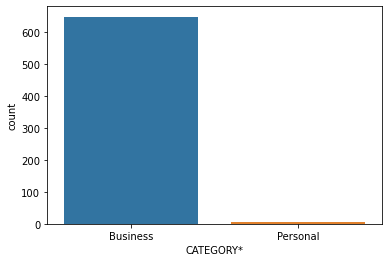

In [24]:
#looking at the plot
sns.countplot(x='CATEGORY*', data= uber)

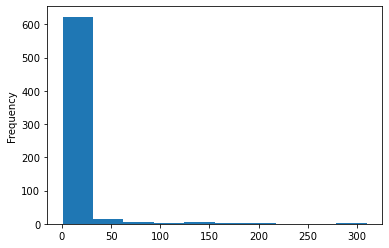

In [25]:
# let us find out how long people travel with uber
uber['MILES*'].plot.hist()

In [26]:
#Insights= Most people travel for a short distance of time, mostrly up to 50miles


In [40]:
#What hour do most people take Uber to their destination?
hours= uber['HOUR'].value_counts()

Text(0.5, 1.0, 'number of trips vs Hours')

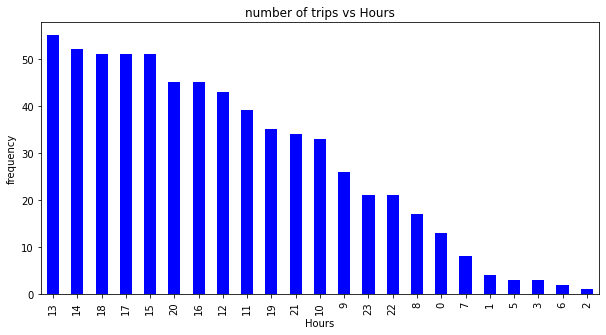

In [42]:
hours.plot(kind= 'bar', color='blue', figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('frequency')
plt.title('number of trips vs Hours')

In [43]:
#INSIGHT= most of thhe booking happen more at around 1pm-8pm


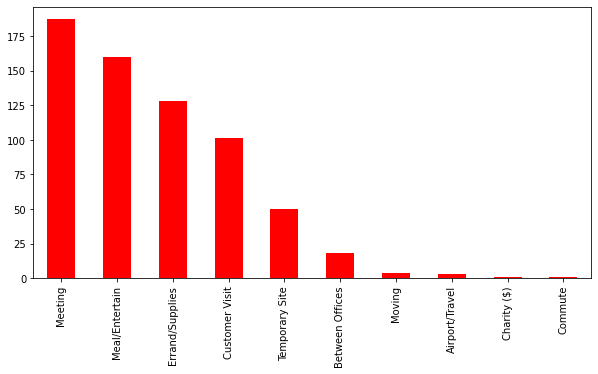

In [50]:
# Check the purpose of the trips
uber['PURPOSE*'].value_counts().plot(kind= 'bar',color='red',figsize=(10,5))

In [51]:
# Insight= Most people book for meetings
#therefore uber can target people who go for meetings since they are their priority customer
# knowing your priority customer, you can better target them. by let say offering
 # a discount o 20% for ride, to those who are going to a meeting or clubs.
    # OR OR YOUR NEXT MEETING WE ARE GIVING 20% DISCOUNTS

In [52]:
# FIND A DAY WITH THE HIGHEST NUMBER OF TRIPS

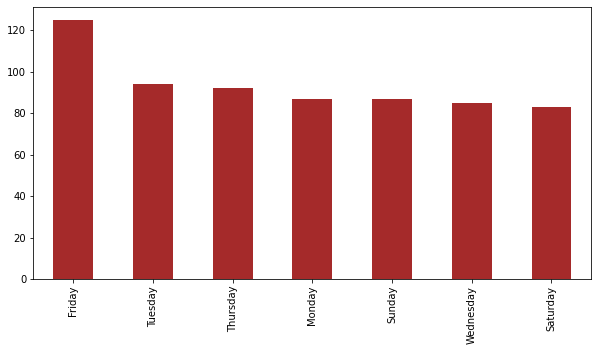

In [54]:
uber['WEEKDAY'].value_counts().plot(kind= 'bar',color='brown',figsize=(10,5))

In [55]:
# INSIGHT: PEOPLE BOOK OR ASK MORE REQUEST ON FIRDAY
   # THIS HELP US TO KNOW WHICH DAY TO TARGET, GIVES PROMOTIONS, COUPONS

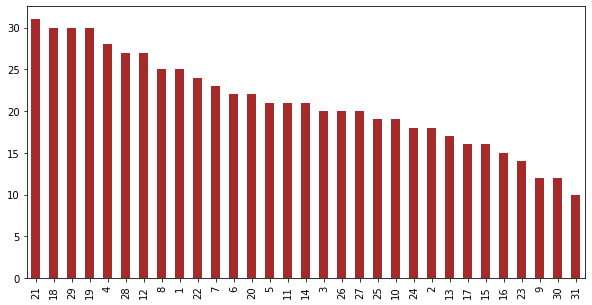

In [56]:
# NUMBER O TRIPS PER EACH DAY
uber['DAY'].value_counts().plot(kind= 'bar',color='brown',figsize=(10,5))

In [57]:
#Insights= The last day of the of the month is the less busies. 
#there is less request from customer during the last day of the month

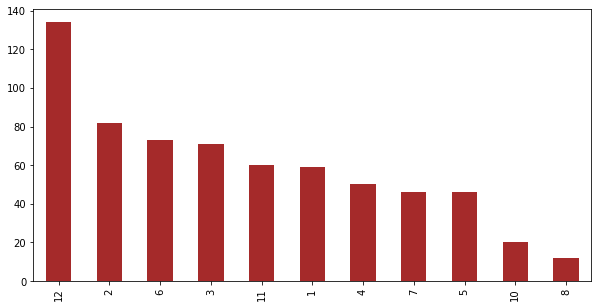

In [58]:
# What are the trips in the month
uber['MONTH'].value_counts().plot(kind= 'bar',color='brown',figsize=(10,5))

In [59]:
# INSIGHT= SO WE KNOW WICH MONTH WE GENERATE MORE PROFITS
# -WE GET LESS UBER REQUESTS THE SUMMER MONTHS
# - THE BUSIEST MONTH IS THE DECEMBER ONE



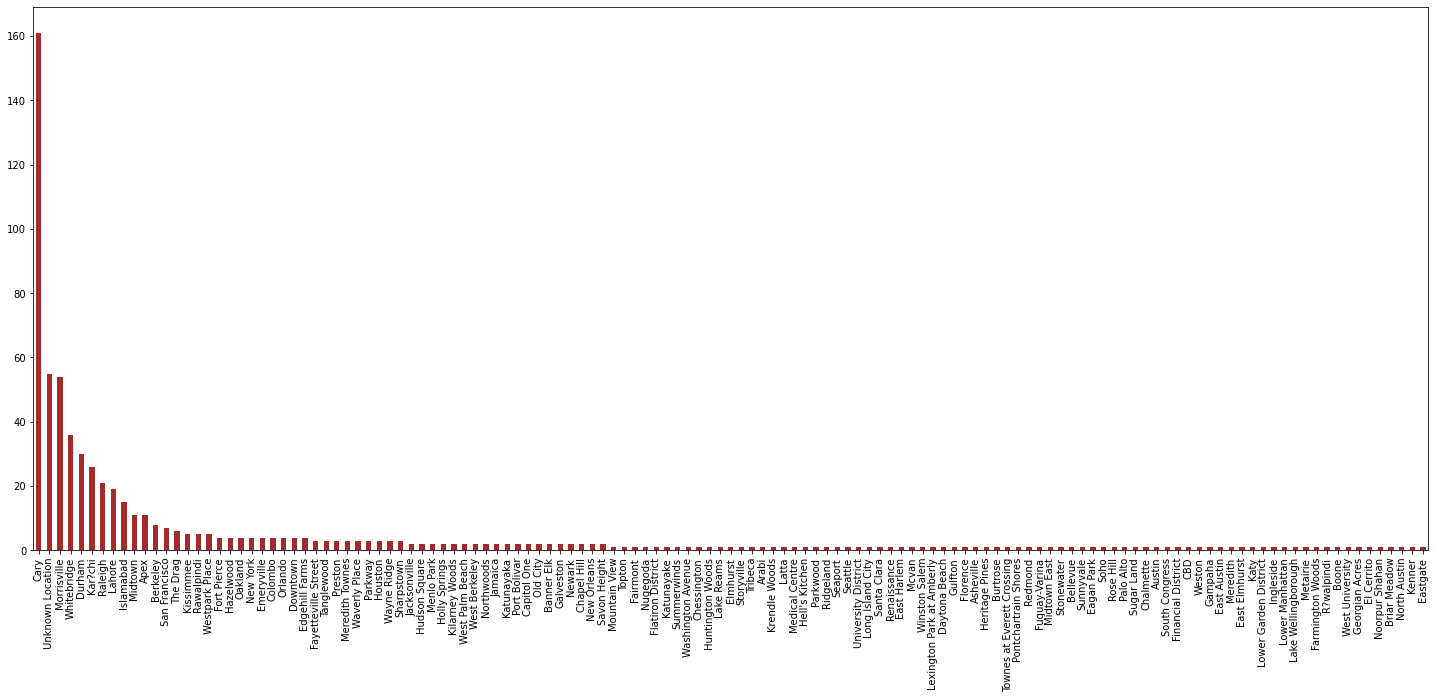

In [64]:
# The starting points of trips. Where Do people start boarding their trip from?
uber['START*'].value_counts().plot(kind= 'bar',color='brown',figsize=(25,10))